In [115]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rnd
plt.rcParams["figure.figsize"] = (6,6) 

In [116]:
class Node:
    def __init__(self,id):
        self.id = id
        self.links=[]
        self.centrality = 0
        
    def linked_to(self,target):
        return target in self.links
        
    def geodesic(self,target=None):
        if target==None:
            target_id = None
        else:
            target_id = target.id
            
            
        def shortest(path):
            pointer = len(path)-1 
            short=[target_id]
            while pointer>0:
                i=0
                while (path[pointer] not in path[i].links):
                    i+=1
                short.append(path[i].id)
                pointer=i
            return short
        
        visited=[]
        stack = [self]
        while len(stack)>0:
            a = stack.pop(0)
            if a.id == target_id:
                visited.append(a)
                return shortest(visited),visited
            if a not in visited:
                visited.append(a)
                stack+=a.links
        return visited

     
        
def link(a,b):
    global graph
    node_a= graph[a]
    node_b= graph[b]
    node_a.links.append(node_b)
    node_b.links.append(node_a)
    nxgraph.add_edge(str(a),str(b))

graph=[]
nxgraph = nx.Graph(directed = False)
for i in range(20):
    graph.append(Node(str(i)))       
link(15,0)
link(0,1)    
link(1,2)
link(2,3)
link(1,4)
link(4,5)
link(3,6)    
link(5,6)  
link(6,10)
link(7,10)    
link(5,8)                 
link(8,9)                  
link(3,12)
link(12,13) 
link(1,16)
link(16,17)
link(17,6)
link(1,18)
link(18,19)
link(19,6)
link(8,11)
link(8,14)                

In [117]:
def geodesic(a,b):
    short,visited  = graph[a].geodesic(graph[b])
    def is_in(p,visited):
        found=[]
        n=visited[p]
        for i in range(p):
            node = visited[i]
            if node.linked_to(n):
                found.append(i)
        return found
    
    s = len(visited)-1
    stack=[s]
    paths = []
    while len(stack)>0:
        p = stack.pop(0)
        found = is_in(p,visited)
        for f in found:
            stack.append(f)
            paths.append(visited[f].id),stack
    return paths


In [118]:
def calc_shortest_paths(a,b):
    x = geodesic(a,b)
    set_x = set(x)
    dict_x1 = dict.fromkeys(set_x, 0)
    dict_x2 = dict.fromkeys(set_x, 0)
    for n in x:
        if n!=str(a):
            if n!=str(b):
                dict_x1[n]+=1
    x = geodesic(b,a)
    for n in x:
        if n!=str(a):
            if n!=str(b):
                dict_x2[n]+=1
    for n in dict_x1:
        if dict_x2[n]<dict_x1[n]:
            dict_x2[n]=dict_x1[n]

    return dict_x2         
    


In [119]:
for i in range(len(graph)):
    for j in range(i+1,len(graph)):
        s = calc_shortest_paths(i,j)
        for d in s:
            graph[int(d)].centrality+=s[d]
            

In [126]:
res=[]
for g in graph:
    res.append([g.id,g.centrality])
res_sorted = sorted(res, key=lambda x: x[1], reverse=True)
print(res_sorted)


[['6', 114], ['5', 89], ['1', 88], ['8', 60], ['3', 59], ['4', 39], ['0', 27], ['2', 27], ['10', 27], ['12', 21], ['17', 21], ['19', 21], ['16', 15], ['18', 15], ['7', 0], ['9', 0], ['11', 0], ['13', 0], ['14', 0], ['15', 0]]


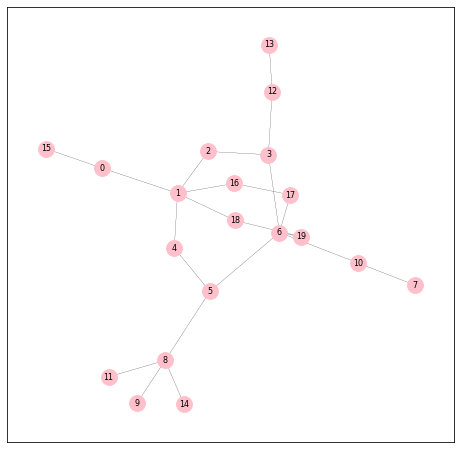

In [114]:
nx.draw_networkx(nxgraph,node_color = "pink",node_size=250,width=0.2,font_size=8)
plt.show() 